# Year 2023 Day 05


In [212]:
import json

import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from IPython.display import Markdown as md
from pyobsplot import Obsplot, Plot

from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.visualization.plotly import (
    ValuedLink,
    build_sankey_figure,
    to_plotly_sankey_input,
)
from advent_of_code.y_2023.problem_202305 import AdventOfCodeProblem202305, Almanac

In [213]:
op = Obsplot(renderer="jsdom", theme="dark")  # Literal['current','light','dark']

In [214]:
problem = AdventOfCodeProblem202305()
problem

AdventOfCodeProblem202305(year=2023, day=5)

In [215]:
# test_input = example_inputs_2023.retrieve(__file__)
# almanac = parse_almanac(test_input)

example_input = get_example_inputs_file_contents(2023)["test_problem_202305"][
    "EXAMPLE_INPUT"
]

## With Example Input


In [216]:
almanac = problem.parse_text_input(example_input)

In [217]:
almanac

Almanac(seeds=[79, 14, 55, 13], maps=[AlmanacMap(source_category='seed', destination_category='soil', ranges=[AlmanacRange(destination_range_start=50, source_range_start=98, range_length=2), AlmanacRange(destination_range_start=52, source_range_start=50, range_length=48)]), AlmanacMap(source_category='soil', destination_category='fertilizer', ranges=[AlmanacRange(destination_range_start=0, source_range_start=15, range_length=37), AlmanacRange(destination_range_start=37, source_range_start=52, range_length=2), AlmanacRange(destination_range_start=39, source_range_start=0, range_length=15)]), AlmanacMap(source_category='fertilizer', destination_category='water', ranges=[AlmanacRange(destination_range_start=49, source_range_start=53, range_length=8), AlmanacRange(destination_range_start=0, source_range_start=11, range_length=42), AlmanacRange(destination_range_start=42, source_range_start=0, range_length=7), AlmanacRange(destination_range_start=57, source_range_start=7, range_length=4)]),

In [218]:
almanac.maps

[AlmanacMap(source_category='seed', destination_category='soil', ranges=[AlmanacRange(destination_range_start=50, source_range_start=98, range_length=2), AlmanacRange(destination_range_start=52, source_range_start=50, range_length=48)]),
 AlmanacMap(source_category='soil', destination_category='fertilizer', ranges=[AlmanacRange(destination_range_start=0, source_range_start=15, range_length=37), AlmanacRange(destination_range_start=37, source_range_start=52, range_length=2), AlmanacRange(destination_range_start=39, source_range_start=0, range_length=15)]),
 AlmanacMap(source_category='fertilizer', destination_category='water', ranges=[AlmanacRange(destination_range_start=49, source_range_start=53, range_length=8), AlmanacRange(destination_range_start=0, source_range_start=11, range_length=42), AlmanacRange(destination_range_start=42, source_range_start=0, range_length=7), AlmanacRange(destination_range_start=57, source_range_start=7, range_length=4)]),
 AlmanacMap(source_category='water

In [219]:
categories = [am.source_category for am in almanac.maps] + [
    almanac.maps[-1].destination_category
]
categories

['seed',
 'soil',
 'fertilizer',
 'water',
 'light',
 'temperature',
 'humidity',
 'location']

In [220]:
def create_lines_df(almanac: Almanac) -> pd.DataFrame:
    lines = []

    for idx, am in enumerate(almanac.maps):
        for r in am.ranges:
            x1_start = r.source_range_start
            x2_start = r.destination_range_start
            x1_end = x1_start + r.range_length
            x2_end = x2_start + r.range_length
            y1 = idx
            y2 = idx + 1

            use_category_names = True
            if use_category_names:
                y1 = categories[y1]
                y2 = categories[y2]
            for x1, x2 in ((x1_start, x2_start), (x1_end, x2_end)):
                lines.append((x1, y1, x2, y2))

    lines_df = pd.DataFrame(lines, columns=["x1", "y1", "x2", "y2"])
    return lines_df


lines_df = create_lines_df(almanac)
lines_df[:4]

,x1,y1,x2,y2
0,98,seed,50,soil
1,100,seed,52,soil
2,50,seed,52,soil
3,98,seed,100,soil


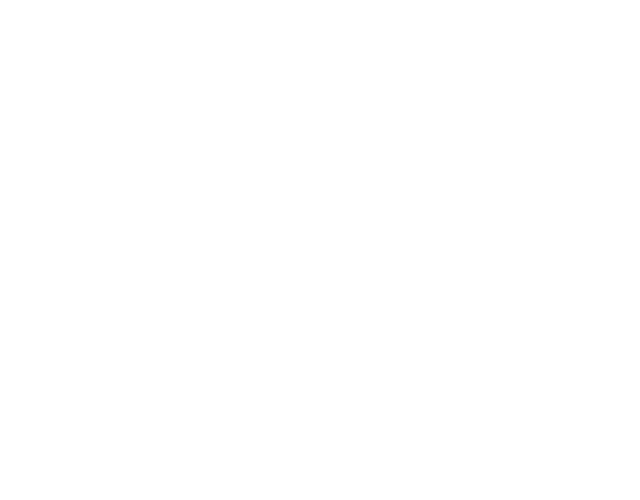

In [221]:
def show_links(lines_df: pd.DataFrame):
    # lines_df : DataFrame with columns x1	y1	x2	y2
    return op( # type: ignore
        dict(
            height=500,
            marginLeft=100,  # make room for the y-axis
            x=dict(label="Identifier number", tickFormat=".0s"),
            y=dict(
                label="Category",
                domain=categories,
                type="band",
                padding=0,
            ),
            marks=[
                Plot.link(
                    lines_df,
                    dict(
                        x1=lines_df["x1"].to_list(),
                        y1=lines_df["y1"].to_list(),
                        x2=lines_df["x2"].to_list(),
                        y2=lines_df["y2"].to_list(),
                        markerEnd="arrow",
                        stroke="currentColor",
                        strokeOpacity=0.3,
                    ),
                ),
            ],
        )
    )


show_links(lines_df)

TODO Use the Link mark https://observablehq.com/plot/marks/link

y = [seed, soil..., humidity] = [0, 1, ...] with [`reverse=True`](https://observablehq.com/plot/features/scales) option
x = constant for all filter = input range

See the reference: https://www.reddit.com/r/adventofcode/comments/18b82w0/2023_day_5_part_2_visualizing_all_the_mapping/


## With Actual Input


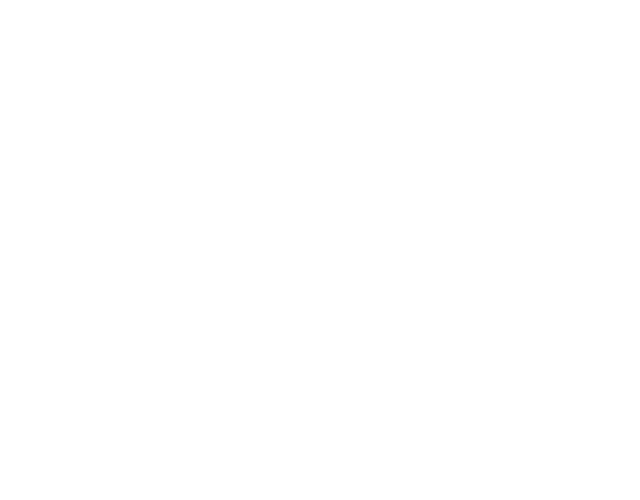

In [222]:
almanac = problem.parse_input_text_file()
lines_df = create_lines_df(almanac)
show_links(lines_df)